# Прикладная статистика. ДЗ 2.
# Академия Аналитиков Авито

__Правила:__
- Жесткий дедлайн: **2022-12-31 23:59**. 
- Ответ и обсуждение решения — в телеграме.

- Выполненную работу нужно отправить
    - в чатик HW2-<ваше имя> через бота @AAA_stats23_bot
- В качестве решения нужно отправить файл ipynb. Ссылка на интернет-ресурсы не принимается. Не публикуйте решения в открытом доступе!
- Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. **При этом можно добавлять новые ячейки!**
- в ячейках с комменарием `#Автопроверка` нужно заполнить содержимое функций и классов (если есть), которые будут уже объявлены в этой ячейке. При этом:
    - Нельзя убрирать или переставять `#Автопроверка` в ячейке. 
    - Нельзя менять сигнатуру и возвращаемое значение функций. То есть добавлять любой код можно, но удалять, что уже написано - нельзя.
    - Нельзя ничего импортировать в таких ячейках. Все доступные для использования библиотеки будут указаны заранее. Такие слова, как `import`, `globals`, `locals`, `eval`, `exec` также нельзя использовать внутри ячеек.
    - Нельзя использовать библиотеки, кроме тех, что указаны в задании. Ваш код должен работать именно с эти набором библиотек без любого дополнительного импорта!
    - Нельзя использовать код из других ячеек ноутбука (кроме ячейки с импортом, в которой указаны все доступные библиотеки). Единственное исключение - если вы проставите в начало такой ячейки слово `#Автопроверка`. Тогда вы можете использовать код из этой ячейки.
    - В случае нарушения этого правила автопроверка будет провалена и вы не получите часть баллов за задачу. 
    - В случае, если есть несколько ячеек автопроверки, то в каждой такой ячейке можно использовать созданные вами функции (или классы) из других ячеек автопроверки.

## Задача 1 (1 балл)

### На зачет

Пусть $x_1, ... x_N$ — реализация выборки $\xi_1, ... \xi_N \sim \mathcal{N}(\mu,\sigma)$. Мы хотим проверить гипотезу:
- $H_0: \mu = \mu_0$
- $H_1: \mu \neq \mu_0$

Реализовать критерий Стьюдента — функцию `simple_my_t_test(sample, mu_0, alpha)`. Функция должна вернуть `SimpleMyTtestResults` с полями
- is_rejected: отверглась или нет гипотеза H_0 на уровне значимости alpha
- pvalue

Какие библиотеки можно использовать:

```
import numpy as np
from collections import namedtuple
import math
from scipy.stats import t
```

In [1]:
import numpy as np
from collections import namedtuple
import math
from scipy.stats import t

Нам неизвестна дисперсия распределения, поэтому мы не можем использовать статситику из нормального распределения, как нам это регламентирует ЦПТ

Но мы знаем, что выборочная дисперсия $ n*S^2/sigma^2 $ распределена по хи-квадрату с n-1 степенью свободы, и мы можем составить статистику, которая имеет распределение Стьюдента, по опредлению. 

Мы составляем статистику, сравниваем с критическими значениями, которые вычисляются для заданного альфа, принимаем или отвергаем гипотезу. P-value расссчитываем по определению.

**Важно:** что ее решение надо объяснить! Можно не вдаваться в детали, но ваш алгоритм надо описать текстом.

In [4]:
# Автопроверка

MySimpleTtestResults = namedtuple('MySimpleTtestResults', 
                                  ['is_rejected', 'pvalue'])

def my_simple_t_test(sample: list, mu_0: float, alpha: float = 0.05):
    """
    Параметры:
    - sample: текущая реализация выборки
    - mu_0: мат. ожидание выборки при H_0
    - alpha: уровень значимости критерия.
        
    Возвращает:
    - MySimpleTtestResults с полями:
        - is_rejected: bool
            - отверглась или нет гипотеза H_0 на уровне значимости alpha
        - pvalue: float
    """

    is_rejected = None
    pvalue = None
    sample = np.array(sample)

    #<Ваш код>
    
    T_X = np.sqrt(len(sample)) * (np.mean(sample) - mu_0) / np.std(sample, ddof=1)
    
    crit_val_right = t.ppf(q=1 - alpha/2, df=len(sample) - 1)
    crit_val_left = t.ppf(q=alpha/2, df=len(sample) - 1)
    
    if T_X < crit_val_left or T_X > crit_val_right:
        is_rejected = True
    else:
        is_rejected = False
    
    F = t.cdf(T_X, df=len(sample) - 1)
    pvalue = min(2 * min(1 - F, F), 1)

    return MySimpleTtestResults(is_rejected, pvalue)


## Задача 2 (4 балла)

Решить прошлую задачу без использования распределения Стьюдента,
**пользуясь следующими библиотеками**

```
from numpy import mean
from numpy import std
from numpy import percentile
from numpy.random import seed
from numpy.random import rand
from numpy import pi
from numpy import log
from numpy import sin
from numpy import cos
``` 

In [ ]:
from numpy import mean
from numpy import std
from numpy import percentile
from numpy.random import seed
from numpy.random import rand # равномерное распределение на [0,1)
from numpy import pi
from numpy import log
from numpy import sin
from numpy import cos

In [ ]:
# Автопроверка

MyTtestResults = namedtuple('MyTtestResults', ['is_rejected', 'pvalue'])

def my_t_test(sample: list, mu_0: float, alpha: float = 0.05):
    """
    Параметры:
    - sample: текущая реализация выборки
    - mu_0: мат. ожидание выборки при H_0
    - alpha: уровень значимости критерия.
        
    Возвращает:
    - MyTtestResults с полями:
        - is_rejected: bool
            - отверглась или нет гипотеза H_0 на уровне значимости alpha
    """

    is_rejected = None
    pvalue = None

    #<Ваш код>

    return MyTtestResults(is_rejected, pvalue)

- Для получения полного балла, p-value вашего критерия не должно отличаться от p-value `scipy.stats.ttest_1samp` больше, чем на 10^-3.
- Если ваш код для одного теста работает больше минуты - он не засчитывается.

## Задача 3 (4 балла)

### На зачет

**1. (0.5 баллов)**

Написать код для проверки критерия при корректности $H_0$:

- Зафиксировать $\mu = 0,\ \mu_0 = 0$ ($H_0$ справедлива)
- Зафиксировать $n, \sigma, \alpha$ на ваше усмотрение
- 10000 раз повторить:
    
    –сгенереровать выборку $x_1,..., x_n$ из $\mathcal{N}(\mu, \sigma)$
    
    –вызвать для нее `my_simple_t_test(sample, mu_0, alpha)`
    
    –на основании выдачи функции принять или не принять $H_1$
- замерить долю ошибок первого рода (False Positive Rate)
- Проверить, стат значимо или нет на уровне 5% отличается полученный процент ошибок от теоретического $\alpha$.


**2. (1.5 балла)**

Провести эксперимент 1 с разными параметрами $n, \sigma, \alpha$.
Оформить отчет о результатах c графиками, комментариями и выводами.

--- 
**3. (0.5 баллов)**

Написать код для проверки критерия при корректности $H_1$:

- Зафиксировать $\mu \neq 0,\ \mu_0 = 0$ ($H_1$ справедлива)
- Зафиксировать $n, \sigma, \alpha$ на ваше усмотрение
- 10000 раз повторить:
    
    –сгенереровать выборку $x_1,..., x_n$ из $\mathcal{N}(\mu, \sigma)$
    
    –вызвать для нее `my_simple_t_test(sample, mu_0, alpha)`
    
    –на основании выдачи функции принять или не принять $H_1$
- замерить долю ошибок второго рода (False Negative Rate)
- Построить доверительный интервал для мощности критерия при заданном $\mu$.

**2. (1.5 балла)**

Провести предыдущий эксперимент с разными параметрами $\mu, n, \sigma, \alpha$.
Оформить отчет о результатах c графиками, комментариями и выводами.

---

### 1 пункт

In [16]:
import scipy.stats as sps

def fpr_check(mu, sigma, alpha, n):
    mu_0 = 0
    rejected_cnt = 0
    k = 10_000
    for _ in range(k):
        sample = sps.norm.rvs(loc=mu, scale=sigma, size=n)
        if my_simple_t_test(sample, mu_0, alpha).is_rejected:
            rejected_cnt += 1
    bad_proc = rejected_cnt / k
    return rejected_cnt, k, bad_proc

In [17]:
fpr_check(0, 1, 0.05, 10000)[2]

0.0492

Проверим полученный fpr с помощью доверительного интервала Уилсона

In [18]:
from statsmodels.stats.proportion import proportion_confint

In [19]:
bad_cnt, total_cnt, bad_proc = fpr_check(0, 1, 0.05, 10000)
print(f"CI = {proportion_confint(count=bad_cnt, nobs=total_cnt, alpha=0.05, method='wilson')}")

CI = (0.0491624202232057, 0.057980567121482626)


Ошибка первого рода лежит в интервале, наше приближение работает хорошо. Но мы бы хотели получать ошибку первого рода, которая не превосходит заявленной стат значимости критерия.

Конечно, если говорить, что результат приближенный, то полученные значения вполне удовлетворительные.

### Пункт 2

Построим fpr от n выборки

In [21]:
n = np.arange(3, 20, 2)
fpr_n = [fpr_check(0, 1, 0.05, i)[2] for i in n]

In [25]:
import matplotlib.pyplot as plt

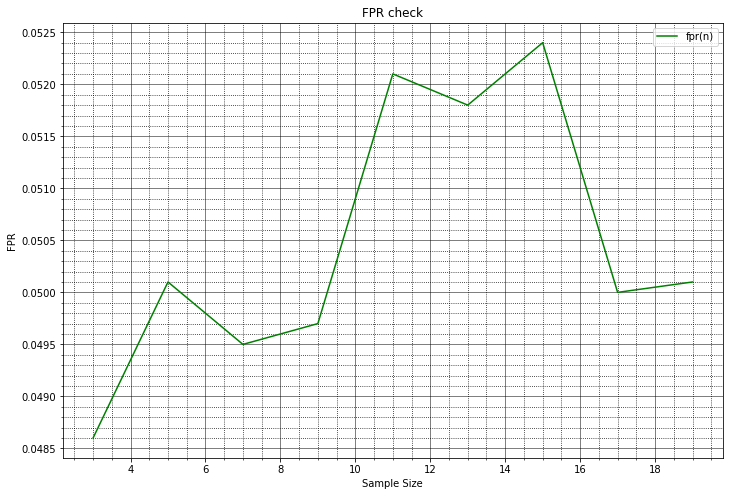

In [26]:
fig = plt.figure(figsize=(26, 8))
ax = fig.add_subplot(121)
ax.minorticks_on()
ax.grid(which='major',
         color = 'k', 
         linewidth = 0.5)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.plot(n, fpr_n, c='green', label='fpr(n)')
plt.ylabel('FPR')
plt.xlabel('Sample Size')
plt.legend(loc='best')
plt.title('FPR check', loc='center')
plt.show()

Даже при малых n alpha лежит в пределах доверительного интервала

In [27]:
alpha = np.linspace(0.01, 0.20, 40)
fpr_n = [fpr_check(0, 1, i, 1000)[2] for i in alpha]

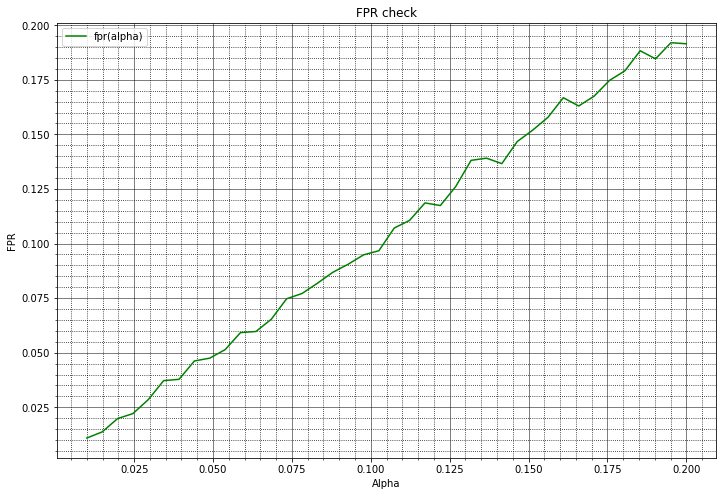

In [29]:
fig = plt.figure(figsize=(26, 8))
ax = fig.add_subplot(121)
ax.minorticks_on()
ax.grid(which='major',
         color = 'k', 
         linewidth = 0.5)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.plot(alpha, fpr_n, c='green', label='fpr(alpha)')
plt.ylabel('FPR')
plt.xlabel('Alpha')
plt.legend(loc='best')
plt.title('FPR check', loc='center')
plt.show()

Линия прямая, что не удивительно, так как по сути мы сейчас проверяли alpha = alpha

In [28]:
sigma = np.linspace(0.8, 20, 20)
fpr_sigma = [fpr_check(0, i, 0.05, 1000)[2] for i in sigma]

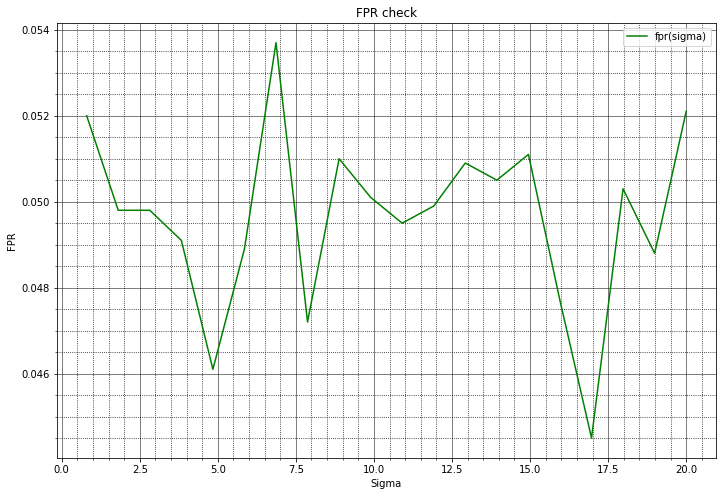

In [31]:
fig = plt.figure(figsize=(26, 8))
ax = fig.add_subplot(121)
ax.minorticks_on()
ax.grid(which='major',
         color = 'k', 
         linewidth = 0.5)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.plot(sigma, fpr_sigma, c='green', label='fpr(sigma)')
plt.ylabel('FPR')
plt.xlabel('Sigma')
plt.legend(loc='best')
plt.title('FPR check', loc='center')
plt.show()

Видим, что от sigma не зависит, alpha лежит в пределах ДИ.

### Пункт 3

In [55]:
def fpr_check(mu, sigma, alpha, n):
    mu_0 = 0
    rejected_cnt = 0
    k = 10_000
    for _ in range(k):
        sample = sps.norm.rvs(loc=mu, scale=sigma, size=n)
        if my_simple_t_test(sample, mu_0, alpha).is_rejected:
            rejected_cnt += 1
    bad_proc = rejected_cnt / k
    return bad_proc

In [56]:
bad_proc = fpr_check(0.1, 1, 0.05, 1000)
print(f'false negative rate = {round((1 - bad_proc) * 100, 2)}%')

false negative rate = 10.78%


Матожидание отличается всего лишь на 0.1, а мощность критерия почти 90%

Давайте построим ДИ для мощности.

Опять же воспользуемся Уилсоновским доверительным интервалом. 

In [57]:
def fpr_check_power(mu, sigma, alpha, n):
    mu_0 = 0
    rejected_cnt = 0
    k = 10_000
    for _ in range(k):
        sample = sps.norm.rvs(loc=mu, scale=sigma, size=n)
        if my_simple_t_test(sample, mu_0, alpha).is_rejected:
            rejected_cnt += 1
    bad_proc = rejected_cnt / k
    return rejected_cnt, k

In [58]:
bad_cnt, total_cnt = fpr_check_power(0.08, 1, 0.05, 10000)
print(f"CI = {proportion_confint(count=bad_cnt, nobs=total_cnt, alpha=0.05, method='wilson')}")

CI = (0.9996160016293234, 1.0)


### Пункт 4

In [61]:
mu = np.linspace(0.01, 0.15, 40)
fnr_mu = [1 - fpr_check(i, 1, 0.05, 1000) for i in mu]

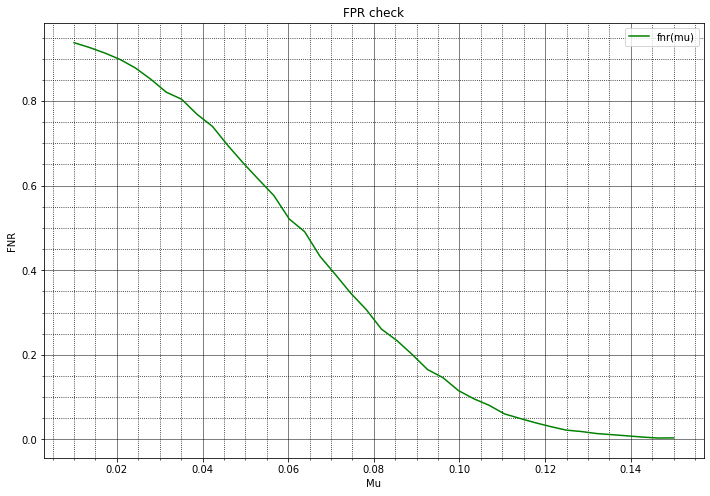

In [65]:
fig = plt.figure(figsize=(26, 8))
ax = fig.add_subplot(121)
ax.minorticks_on()
ax.grid(which='major',
         color = 'k', 
         linewidth = 0.5)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.plot(mu, fnr_mu, c='green', label='fnr(mu)')
plt.ylabel('FNR')
plt.xlabel('Mu')
plt.legend(loc='best')
plt.title('FNR check', loc='center')
plt.show()

График соотссветсвует ожиданиям -- чем меньше mu, тем больше мы ошибаемся, так как критерий не может отличить данные.

In [66]:
alpha = np.linspace(0.01, 0.20, 40)
fnr_alpha = [1 - fpr_check(0, 1, i, 1000) for i in alpha]

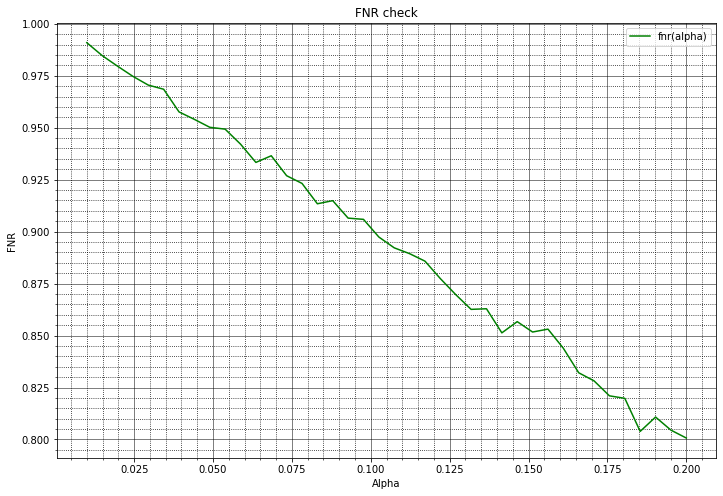

In [69]:
fig = plt.figure(figsize=(26, 8))
ax = fig.add_subplot(121)
ax.minorticks_on()
ax.grid(which='major',
         color = 'k', 
         linewidth = 0.5)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.plot(alpha, fnr_alpha, c='green', label='fnr(alpha)')
plt.ylabel('FNR')
plt.xlabel('Alpha')
plt.legend(loc='best')
plt.title('FNR check', loc='center')
plt.show()

Зависимость линейная, как и ожидалось

In [67]:
n = np.arange(3, 20, 2)
fnr_n = [1 - fpr_check(0, 1, 0.05, i) for i in n]

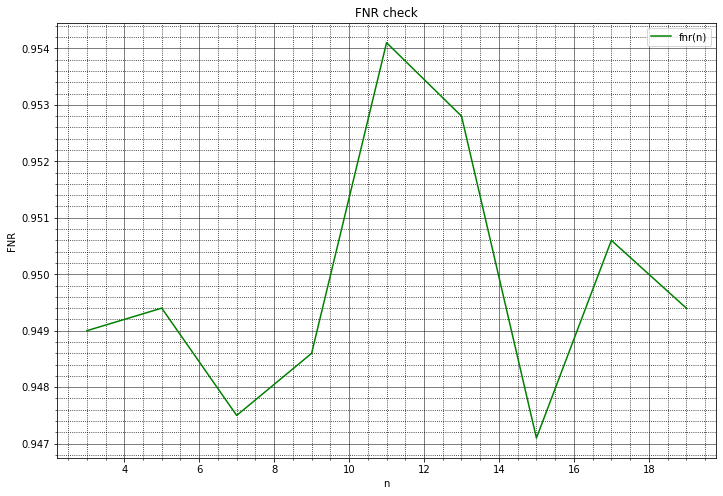

In [70]:
fig = plt.figure(figsize=(26, 8))
ax = fig.add_subplot(121)
ax.minorticks_on()
ax.grid(which='major',
         color = 'k', 
         linewidth = 0.5)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.plot(n, fnr_n, c='green', label='fnr(n)')
plt.ylabel('FNR')
plt.xlabel('n')
plt.legend(loc='best')
plt.title('FNR check', loc='center')
plt.show()

Из графика можно сделать вывод, что FNR не зависит от размера выборки

In [68]:
sigma = np.linspace(0.8, 20, 20)
fnr_sigma = [1 - fpr_check(0, i, 0.05, 1000) for i in sigma]

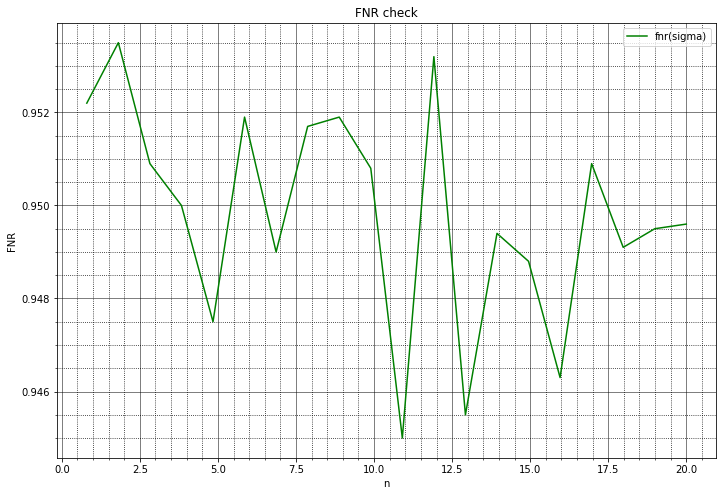

In [71]:
fig = plt.figure(figsize=(26, 8))
ax = fig.add_subplot(121)
ax.minorticks_on()
ax.grid(which='major',
         color = 'k', 
         linewidth = 0.5)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.plot(sigma, fnr_sigma, c='green', label='fnr(sigma)')
plt.ylabel('FNR')
plt.xlabel('n')
plt.legend(loc='best')
plt.title('FNR check', loc='center')
plt.show()

FNR от sigma так же не зависит, FNR лежит в ДИ.

## Задача 4 (2 балла)

### На зачет

Петя скачал себе новую игру себе на телефон. Чтобы начать в нее играть, она должна загрузиться от 0% до 100%, где каждый процент игры загружается независимо ни от чего, и время загрузки каждого процента подчиняется экспоненциальному распределению со средним в 2 сек. Но вот незадача: через 3 минуты Пете надо бежать на автобус к бабушке в деревню, а в дороге Петя хочет уже поиграть( Но игра может скачаться только при подключенном домашнем WI-FI, то есть только только в течение этих 3 минут. С какой вероятностью игра успеет загрузиться и Петя сможет поиграть в дороге? В ответе можно использовать следующие функции распределения:

- Экспоненциальное
- Нормальное
- Равномерное



Будем пользоваться ЦПТ.

Нам сказано, что загрузка каждого процента по времени есть случайная величина с $ Exp(\lambda = 1/2) $. 

Занятно, что $ Exp(\lambda = 1/2) = Chi2(2)$, а так как у нас они все независимые, то их сумма $Chi2(200)$, но нам нельзя использовать $Chi2$. Ну ладно, приблизим его к нормальному.

$S = \Sigma_{1}^{100} X_i$, где $X_i \in Exp(1/2)$ или $\in Chi2(2)$

$S \in Chi2(200)$

Моментый характеристики хи-квадрата: 

$\mathbb{E}S = 200$

$\mathbb{D}S = 2 * 200 = 400$

Таким образом из ЦПТ:

$S \in Norm(200, 400)$

Искомая вероятность есть `sps.norm(loc=200, scale=20).cdf(180)`

In [73]:
sps.norm(loc=200, scale=20).cdf(180)

0.15865525393145707

Таким образом, с вероятностью около 16% у Пети скачается игра до выхода.

## Задача 5 (3 балла)

### На зачет

Пусть есть равные группы A и B. По результатам теста выручка от одного пользователя в среднем в условиях A оценивается Стьдентом как 50 ± 3 руб, а в условиях B как 56 ± 4 руб. Аналитик, увидев такие результаты, говорит, что эффект составил 6 ± 7 руб, а значит результат AB-теста не стат. значим. Все ли корректно в этих рассуждениях? Любой ответ должен быть аргументирован. В случае, еcли в рассуждениях есть ошибка, то надо также посчитать корректно доверительный интервал.


Восользуемся этим:

$T(A, B) = \dfrac{\overline A - \overline B}{\sqrt{S^2_{A}/N + S^2_{B}/M}} \overset{H_0}{\sim} \mathcal{N}(0, 1)$

Проанализируем вообще, можно ли предполагать, что есть какие-то изменения на уровне значимости. 

Предположим, что рамзер групп А и В одинаков и равен 100

In [79]:
sps.norm(loc=0, scale=1).cdf((56-50)/((9/100 + 16/100)**0.5))

1.0

Значение статистики экстремально, мы не можем принять гипотезу о равенстве матожиданий. 

Пусть $\delta = \overline{A} - \overline{B}$ - будем для него строить ДИ.

Также будем работать в предположении, что размер групп А и В одинаков и равен n - для простоты.

$ T = \sqrt{\dfrac{n^2*(2n - 2)}{2n}} * \dfrac{\overline{A} - \overline{B} - \delta}{\sqrt{n}*\sqrt{S^2_A + S^2_B}} \sim St(2n - 2) $

Упростим

$ T = \sqrt{n - 1} * \dfrac{\overline{A} - \overline{B} - \delta}{\sqrt{S^2_A + S^2_B}} \sim St(2n - 2) $

Построим доверительный интервал, выделя $\delta$ в неравенстве.

$\{\overline{A}-\overline{B} - T_{0.975}*\sqrt{\dfrac{1}{n-1} * (S^2_A + S^2_B)} < \delta < \overline{A}-\overline{B} - T_{0.025}*\sqrt{\dfrac{1}{n-1} * (S^2_A + S^2_B)}\}$

Опять же посмотрим для разных n

In [82]:
n = 30

T_975 = sps.t.ppf(0.975, df=2*n-2)
T_025 = sps.t.ppf(0.025, df=2*n-2)
left = 50 - 56 - T_975 * ((9 + 16)/(n-1))**0.5
right = 50 - 56 - T_025 * ((9 + 16)/(n-1))**0.5
print(left, right)

-7.858548024714238 -4.1414519752857615


In [87]:
n = 100

T_975 = sps.t.ppf(0.975, df=2*n-2)
T_025 = sps.t.ppf(0.025, df=2*n-2)
left = 50 - 56 - T_975 * ((9 + 16)/(n-1))**0.5
right = 50 - 56 - T_025 * ((9 + 16)/(n-1))**0.5
print(left, right)

-6.99097606878758 -5.00902393121242


In [88]:
n = 5

T_975 = sps.t.ppf(0.975, df=2*n-2)
T_025 = sps.t.ppf(0.025, df=2*n-2)
left = 50 - 56 - T_975 * ((9 + 16)/(n-1))**0.5
right = 50 - 56 - T_025 * ((9 + 16)/(n-1))**0.5
print(left, right)

-11.765010337583426 -0.23498966241657282


Видим, что 0 не лежит в доверительном интервале (доверительный интервал 95%), поэтому мы можем полагать, что изменения действительно значимые, и выручка в условиях B выше. 

## Задача 6

### Пункт А. 1 балл: 
#### На зачет

Какая связь между MDE и шириной доверительного интервала в t-test уровня значимости $\alpha$? Точнее, между MDE и `CI length / 2` (шириной дов. интервала пополам).

При каких параметрах ($\alpha,\ \beta$) они будут равны?



Известно с лекций, что:

$\text{MDE} = (z_{1 - \alpha} + z_{1 - \beta}) \cdot \sqrt{\dfrac{S^2}{N}}$

$CI_{\mu} = \left(\overline X \pm \dfrac{t_{n - 1, 1 - \alpha/2} \sqrt{S^2}}{\sqrt{n}} \right)$

Таким образом, $MDE = \dfrac{z_{1-\alpha}+ z_{1-\beta}}{t_{n - 1, 1 - \alpha/2}} CI_{length}/2 $

При $ z_{1-\alpha}+ z_{1-\beta} = t_{n - 1, 1 - \alpha/2} $ $\Rightarrow$  $ MDE = CI_{length}/2 $ 

In [83]:
sps.norm(loc=0, scale=1).ppf(1 - 0.05)

1.6448536269514722

In [84]:
sps.t.ppf(1 - 0.05, df=30-1)

1.6991270265334972

In [86]:
1 - sps.norm(loc=0, scale=1).cdf(sps.t.ppf(1 - 0.05, df=30-1) - sps.norm(loc=0, scale=1).ppf(1 - 0.05))

0.4783586711833514

Таким образом, вот я привел пример такой пары $(\alpha, \beta) = (0.05, 0.478)$, для которой MDE равен половине ширины доверительного интервала (при n=30). 

### Пункт B. 2 балла: 

Допустим, вам дан критерий $\Psi$ для провекри гипотезы $H_0: D \overline X = \sigma^2$. Статистика критерия &mdash; $S^2$, а сам критерий является черным ящиком. Можно ли найти такие параметры $\alpha$, $\beta$, чтобы значение MDE равнялась `CI length / 2` уровня значимости $\alpha$? При этом вы не знаете распределения $S^2$?

Какого свойства распределения статистики вам не хватает, чтобы можно было без знания самого распределения приравнять MDE и половину ширины дов. интервала?

## Задача 7 (1 балл)

### Пункт А. 1 балл:

Пусть даны независимые выборки $A, B$ равного размера. То есть у вас есть выборки $A_1, A_2, \dots A_N$ и $B_1, B_2, \dots B_N$, N большое.

Докажите теоретически, что в этом случае вы можете точно также использовать `T'-test`. То есть:

$T(A, B) = \dfrac{\overline A - \overline B}{\sqrt{S^2/N}} \overset{H_0}{\sim} \mathcal{N}(0, 1)$, 
Где $S^2$ &mdash; статистика S^2 для некоторой выборки



### Пункт B* 2 балла:

Докажите что в этом случае

- $T(A, B) = \dfrac{\overline A - \overline B}{\sqrt{S^2_{A}/N + S^2_{B}/N}} \overset{H_0}{\sim} \mathcal{N}(0, 1)$


## Задача 8* (3 балла)

На занятии мы увидели, почему большой размер выборки помогает точнее получить оценку для матожидания случайной величины. Используя аппарат математической статистики, покажите, какому товару стоит доверять больше. Возможно, вам придётся использовать допущения, но такова жизнь.

Согласны ли вы с автором поста? Есть ли дополнительные (не связанные с математикой) причины доверять правому товару больше чем левому?

![](https://i.ibb.co/HHWfF8s/change.jpg)